In [1]:
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow
import os
from dotenv import load_dotenv

In [2]:
!nvidia-smi

Wed Jul 30 13:51:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.03              Driver Version: 575.64.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P3             17W /   30W |      15MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
load_dotenv()
API_KEY = os.getenv('API_KEY')

Using Roboflow for dataset creation and augmentation. Downloading data from Roboflow

In [5]:
rf=Roboflow(api_key=API_KEY)
project =rf.project('facemask-e8tat')
version=project.version(1)
dataset=version.download('yolov11')

Extracting Dataset Version Zip to FaceMask-1 in yolov11:: 100%|██████████| 3566/3566 [00:00<00:00, 6038.77it/s]


Training Yolo11n on mask dataset

In [7]:
!yolo task=detect mode=train model="yolo11s.pt" data={dataset.location}/data.yaml epochs=15 imgsz=640 batch=16 name=facemask

100%|███████████████████████████████████████| 18.4M/18.4M [00:49<00:00, 387kB/s]
Ultralytics 8.3.170 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/FaceMask-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale

In [28]:
!yolo task=detect mode=predict model='/home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/runs/detect/facemask/weights/best.pt' conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.170 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/73 /home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/FaceMask-1/test/images/39001_Mask_Mouth_Chin_jpg.rf.3ac24f6965cf649a8040265ef96fdea0.jpg: 640x640 1 1, 13.2ms
image 2/73 /home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/FaceMask-1/test/images/39010_Mask_Mouth_Chin_jpg.rf.ed001911bb5207aa6ff10b916d39a89a.jpg: 640x640 1 0, 1 1, 12.8ms
image 3/73 /home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/FaceMask-1/test/images/39012_Mask_Mouth_Chin_jpg.rf.82d8bf5cfcb247766bca5b1eee25cf02.jpg: 640x640 1 1, 13.1ms
image 4/73 /home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/FaceMask-1/test/images/39022_Mask_Mouth_Chin_jpg.rf.7636e321195a1231af2c8d7443de9373.jpg: 640x640 2 1s, 13.0ms
image 5/73 /home/zain/work/learning/deep_le

We are getting @precision = 90.6,  @recall 83.8 and mAP@50 = 90.5 and maAP@50-95 = 59.4 

In [10]:
!yolo val model='/home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/runs/detect/facemask3/weights/best.pt'  data={dataset.location}/data.yaml imgsz=640 batch=16

Ultralytics 8.3.170 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5804MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 221.4±63.1 MB/s, size: 46.1 KB)
val: Scanning /home/zain/work/learning/deep_learning/vision/MaskDetection/Notebo
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        150        911      0.906      0.838      0.905        0.6
                     0        125        705       0.94      0.887      0.957      0.675
                     1         41         49      0.963      0.837      0.917        0.6
                     2         46        157      0.816       0.79      0.841      0.526
Speed: 2.0ms preprocess, 6.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


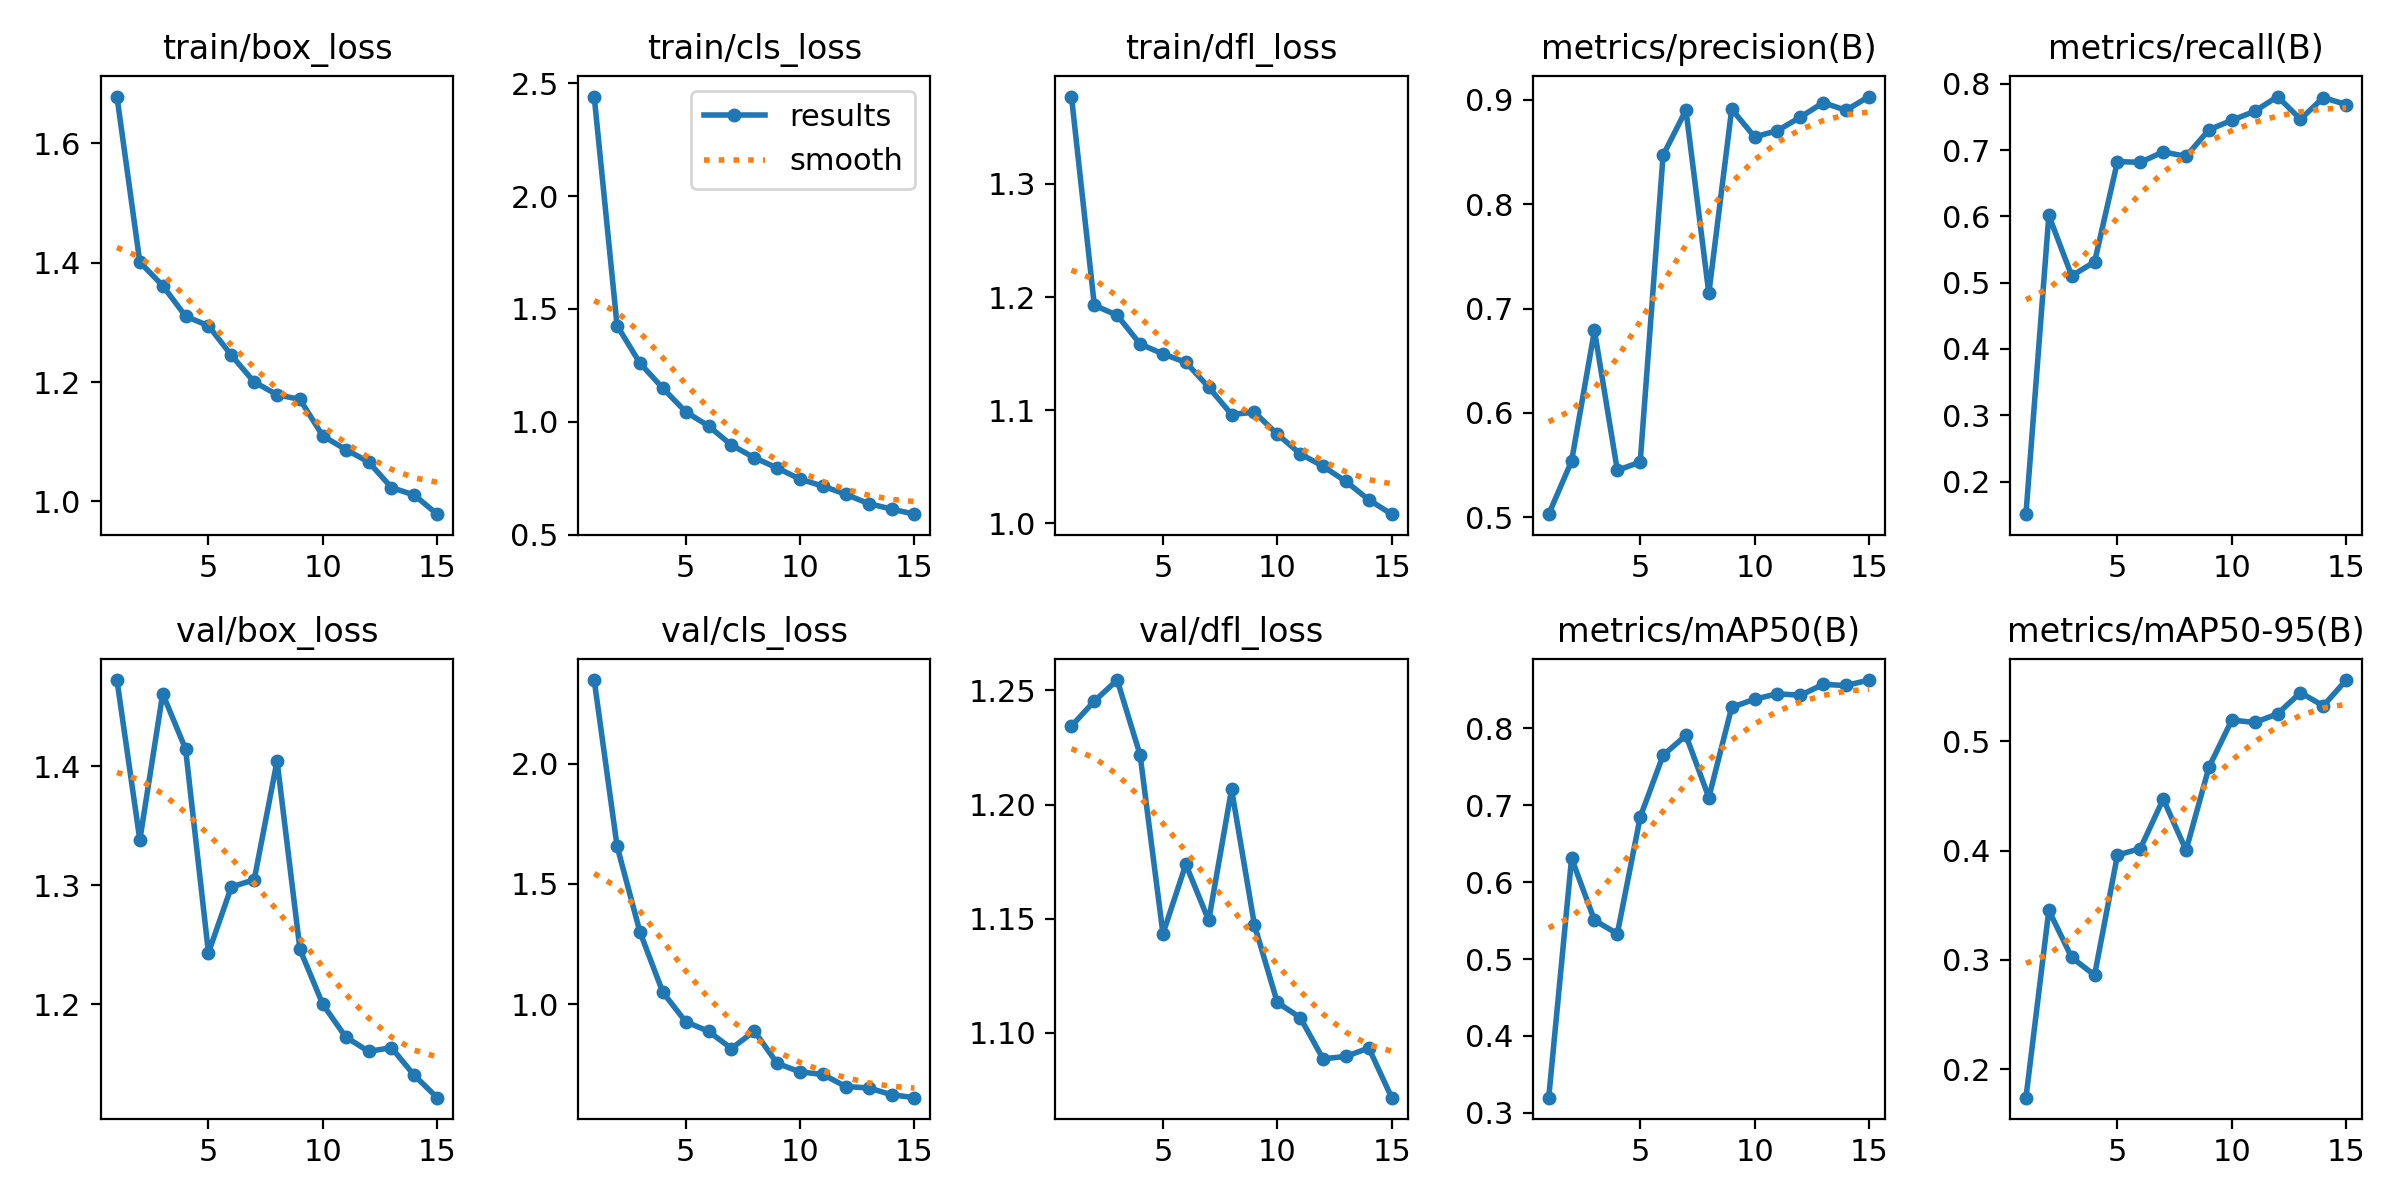

In [9]:
Image(filename='/home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/runs/detect/facemask2/results.png', width=600)

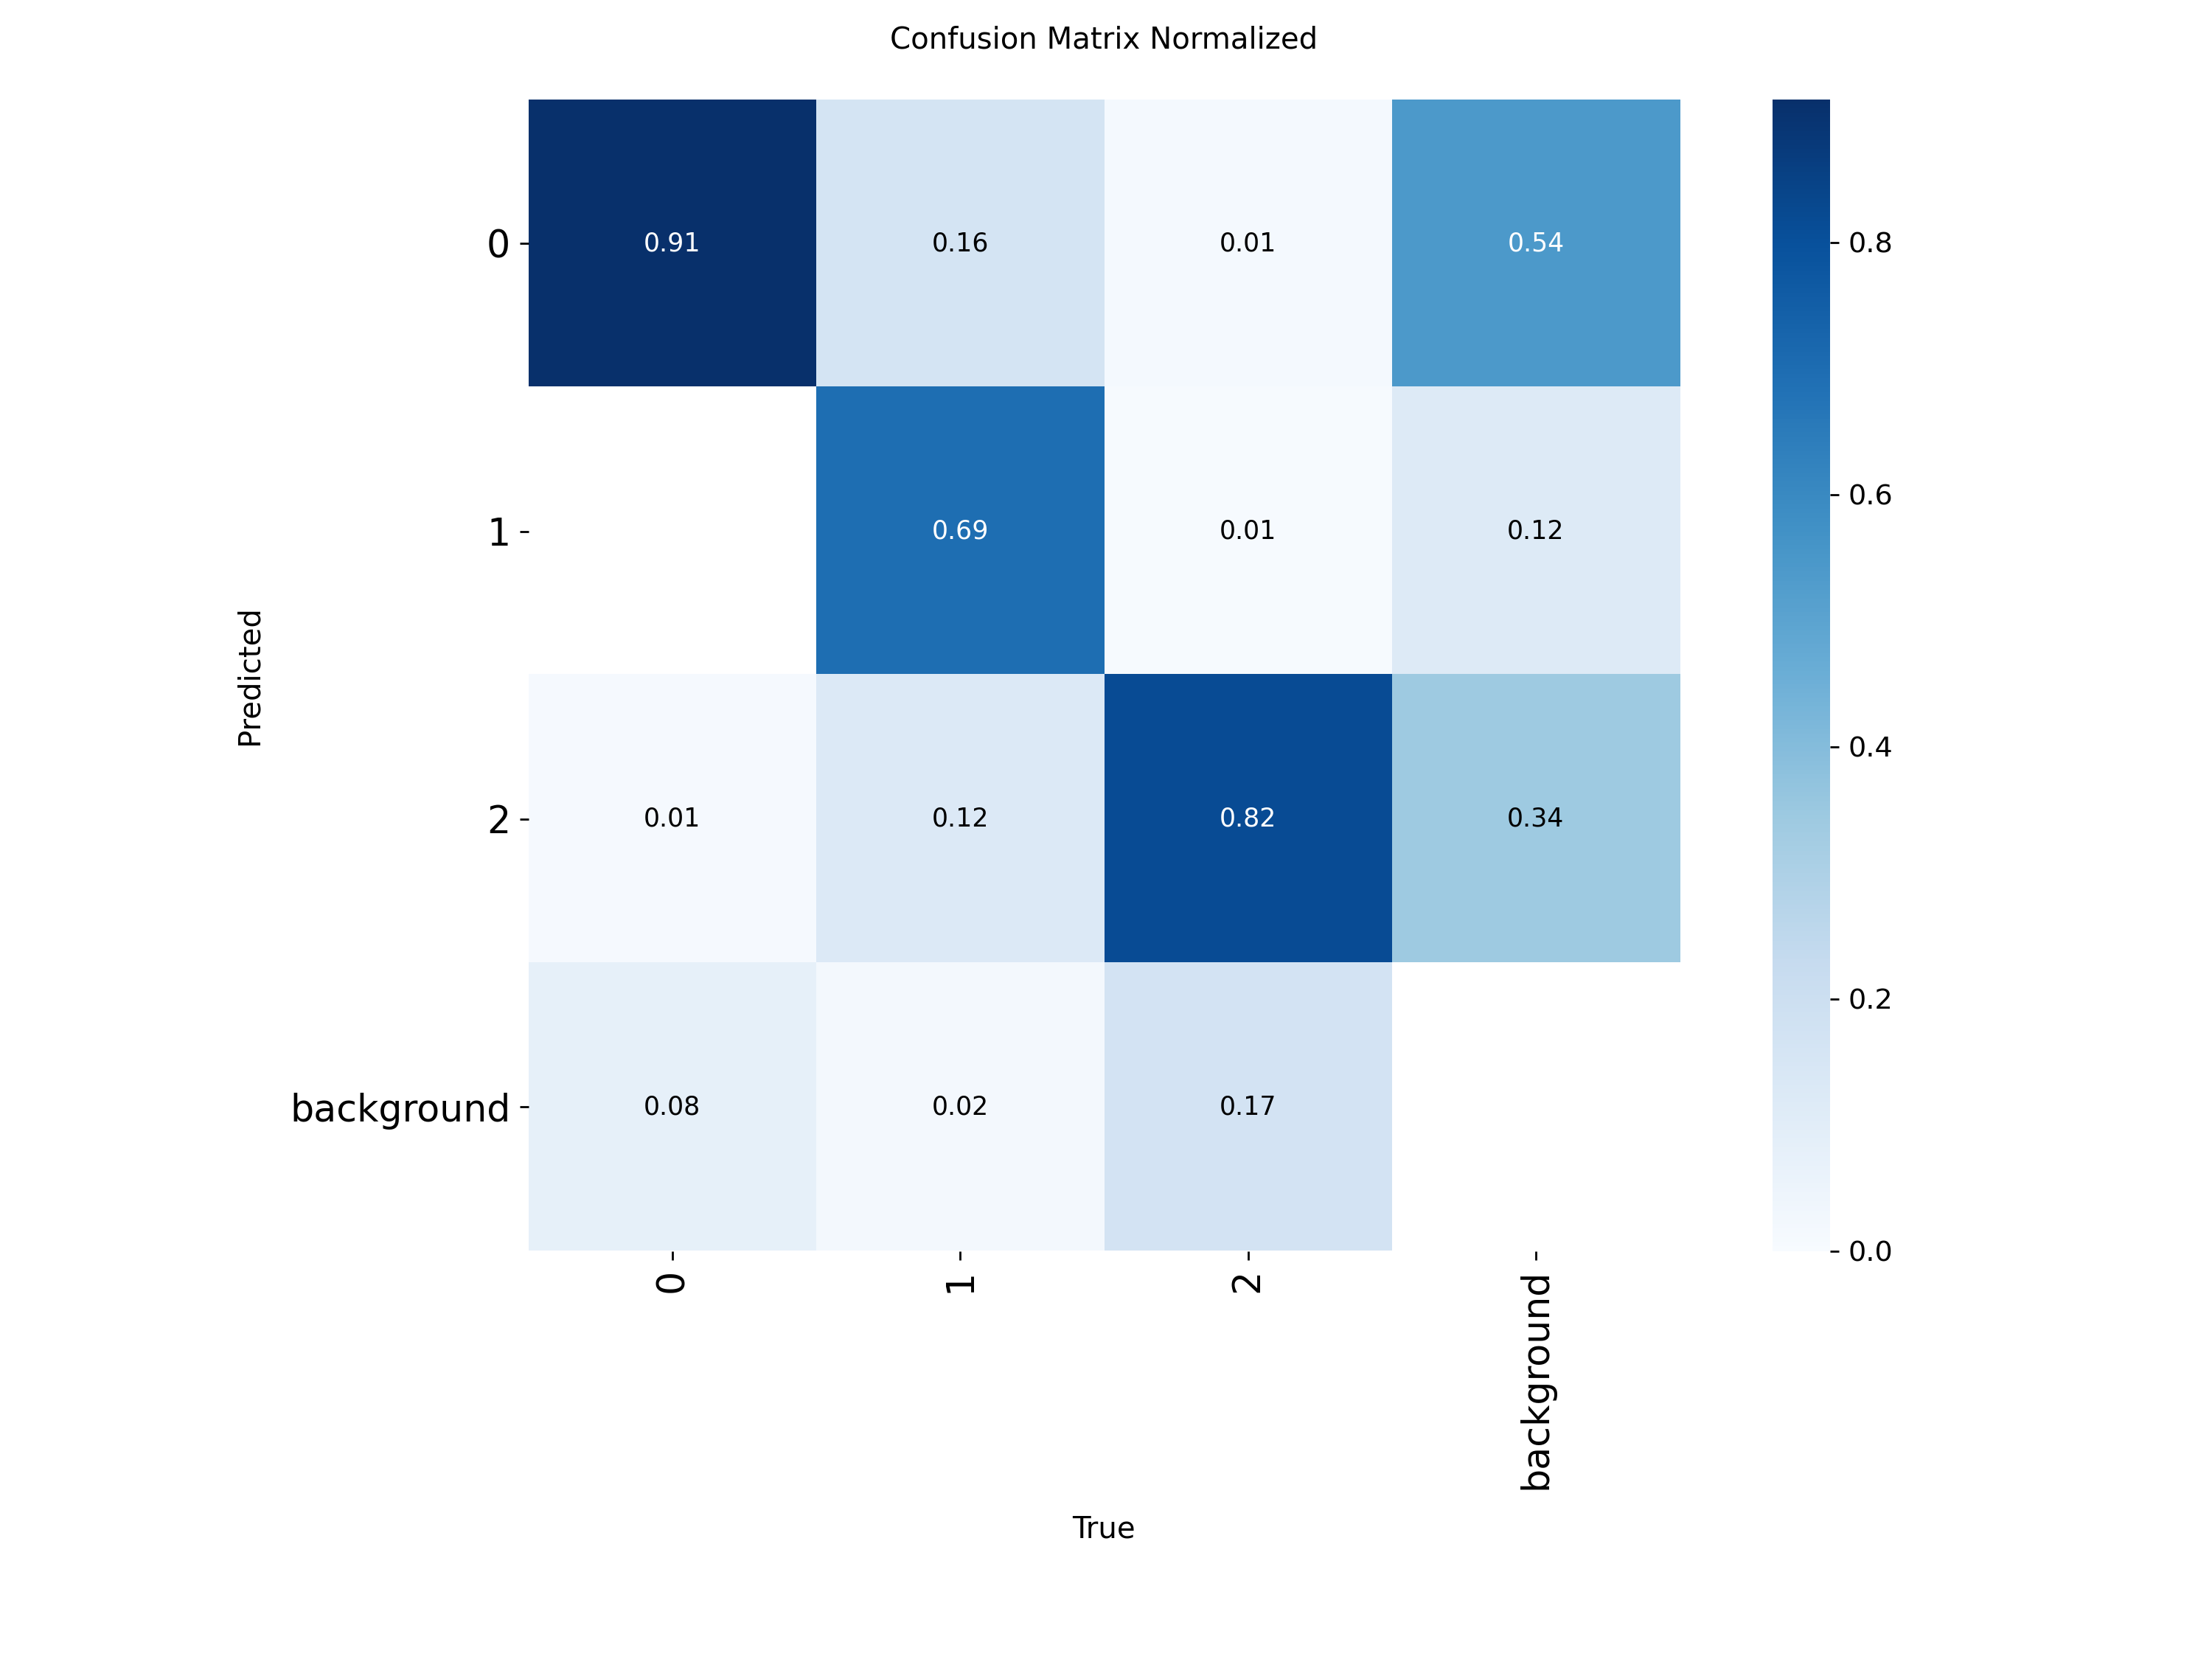

In [11]:
Image(filename='/home/zain/work/learning/deep_learning/vision/MaskDetection/Notebook/runs/detect/val2/confusion_matrix_normalized.png', width=600)